<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regularization" data-toc-modified-id="Regularization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regularization</a></span></li></ul></div>

# Regularization

We show here how to play with the regularization factor ($\lambda$). In this case, scikit learn uses $C$ which is the inverse of $\lambda$, but the effect is exactly the same.

We will use the dataset used in the feature importance notebook about [contraceptive methods](http://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice).

In [2]:
from dataset import Dataset as dataset
from sklearn.linear_model import LogisticRegression
from sklearn.svm import l1_min_c
from typing import List
from skrebate import ReliefF

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Dataset preparation simply takes the same steps we followed in the other notebook:

In [51]:
df = dataset('http://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data', header=None)
df.to_int(df.names());
df.merge_values(column='x9', old_values=[2, 3], new_value=0)
df.to_int('x9').set_target('x9');
df = df.to_categorical(['x1','x2','x4','x5','x6','x7','x8'])
df.discretize('x0', [(15, 20), (20, 25), (25, 30), (30, 35), (35, 40), (40, 50)])
df.discretize('x3', [(0, 2), (2, 4), (4, 6), (6, 8), (8, 10), (10, 20)])
df.onehot_encode(df.names('features'));
X, y = df.split(test_size=0.2)

In [52]:
def coefficients_behavior(X, y, cs, penalty='l1'):
    
    clf = LogisticRegression(penalty=penalty, solver='liblinear',
                             tol=1e-6, max_iter=int(1e6),
                             warm_start=True, intercept_scaling=10000.)
    coefs_ = []
    for c in cs[::-1]:
        clf.set_params(C=c)
        clf.fit(X, y)
        coefs_.append(clf.coef_.ravel().copy())

    return coefs_

In [59]:
def plot_behaviour(cs, coefs):
    coefs = np.array(coefs)
    plt.figure(figsize=(8, 6))

    plt.axhline(0, c='k', alpha=0.4)
    plt.axvline(0, c='k')
    plt.plot(np.log10(cs), coefs, linewidth=0.8)

    plt.xlabel('log(C)')
    plt.ylabel('Coefficients')
    plt.title('Logistic Regression Path')
    plt.axis('tight')
    plt.show()

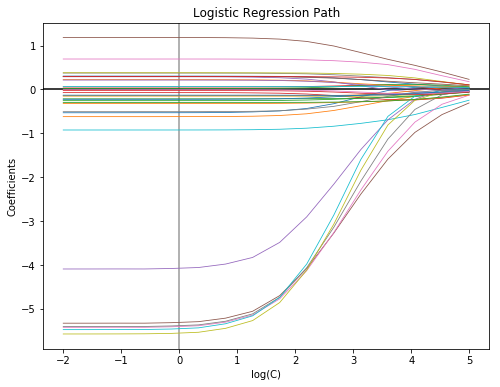

In [60]:
cs = l1_min_c(X.train, y.train, loss='log') * np.logspace(0, 7, 16)

coefs = coefficients_behavior(X.train, y.train, cs, penalty='l2')
plot_behaviour(cs, coefs)

As $\lambda$ increases, more variables' coefficients go to 0. Once a variable has a 0 coefficient, it has no impact on the model anymore. So, as $\lambda$ increases, the model uses fewer and fewer variables. This is what we mean by a sparse solution - it only uses a few variables in the dataset.

The SciKit implementation of Logistic Regression uses the parameter $C$, instead of $\lambda$. Remember that $C$ is just the opposite, so, the smaller the $C$, more features aproach to 0. In this illustration we reversed the order of the array with values of the coefficientes (`cs[::-1]` at line 7), just to illustrate the effect of Regularization on Logistic Regression, the same way we used in the lecture notes, or in the book.